### Analyse en composantes principales 

L'analyse en composantes principales (ACP ou PCA en anglais pour principal component analysis)est une méthode de la famille de l'analyse des données et plus généralement de la statistique multivariée, qui consiste à transformer des variables liées entre elles (dites « corrélées » en statistique) en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées « composantes principales », ou axes principaux. Elle permet au praticien de réduire le nombre de variables et de rendre l'information moins redondante.

In [32]:
#Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as n
import seaborn as sns

In [35]:
#Data
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [36]:
#Description des donées
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [38]:
data = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])

In [39]:
data.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.04951,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.1216,0.13880,0.17000,0.10170,0.2369,0.06599
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.12660,0.12420,0.09391,0.2827,0.06771
179,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,0.06133,...,13.63,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319
377,13.46,28.21,85.89,562.1,0.07517,0.04726,0.012710,0.01117,0.1421,0.05763,...,14.69,35.63,97.11,680.6,0.1108,0.14570,0.07934,0.05781,0.2694,0.07061
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.035340,0.02944,0.1714,0.05898,...,15.66,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234


Il est difficile de visualiser des données de grande dimension, L'alternative qu'on a c'est d'utiliser l'ACP pour trouver les deux premiers composants principaux, et visualiser les données dans ces nouveaux composant, un espace bidimensionnel, avec un seul nuage de points, mais avant de le faire, on est besoin de standariser les données de sorte que chaque entité a une variance d'unité unique

#### Standarisation des données

In [54]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
scaler.fit(data)
nv_data  = scaler.transform(data) 

In [55]:
from sklearn.decomposition import PCA
ACP = PCA(n_components = 2) #n_components = Nombre de composants à conserver. si n_components n'est pas défini, tous les composants sont conservés: 
ACP.fit(nv_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
#Transformer les données en deux axes
data_ACP = ACP.transform(nv_data) #Transform prend comme paramètre les données standarisées

In [50]:
print("Avant ACP",data.shape ) #Avant ACP : 30 composantes

Avant ACP (569, 30)


In [57]:
print("Après ACP",data_ACP.shape ) #Après ACP : 2 composantes

Après ACP (569, 2)


#### Visualisations

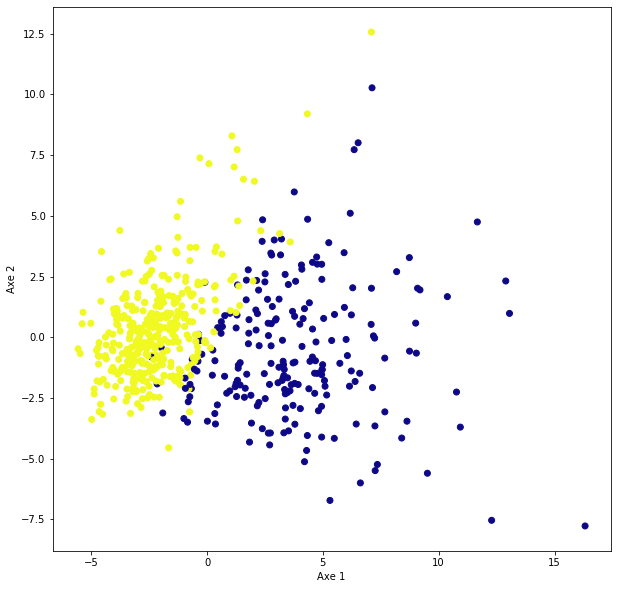

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(data_ACP[:,0], data_ACP[:,1], c = cancer_data['target'], cmap='plasma')
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.show()

In [67]:
ACP.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Dans ce tableau matriciel, chaque ligne représente un composant principal et chaque colonne renvoie aux caractéristiques d'origine. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


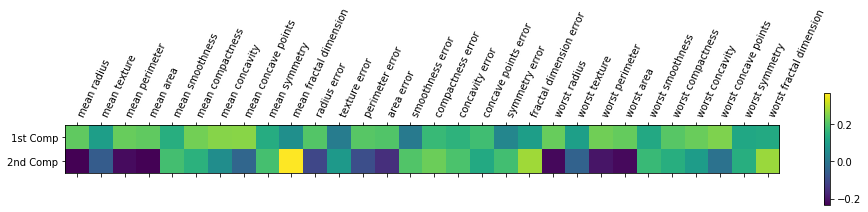

In [68]:
plt.matshow(ACP.components_,cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer_data.feature_names)),cancer_data.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 